# ArcGIS API for Python: Aggregate Traffic Collisions

When learning to use Python in GIS, it is helpful to compare a manual workflow with the same workflow using Python code. In this lesson, you will complete a common web mapping and analysis workflow in ArcGIS Online and in an ArcGIS Notebook using Python. You will find content in ArcGIS Online, add it to a web map, and perform spatial analysis on the data. Keep this notebook open and follow the instructions to get a deeper understanding of web GIS using ArcGIS Notebooks.

In this lesson, you will do the following:
* [Create a map in ArcGIS Online](#create-a-map-agol)
* [Create a map in ArcGIS Notebooks](#create-a-map-arcgis-nb)
* [Perform analysis in ArcGIS Online - Aggregate by block group](#perform-analysis-agol)
* [Perform analysis in ArcGIS Online - Aggregate by hexagonal bins](#perform-analysis-agol-hexagons)
* [Perform analysis in a Notebook - Aggregate by block group](#perform-analysis-block-group)
* [Perform analysis in a Notebook - Aggregate by hexagonal bins](#perform-analysis-hexbins)
* [Complete a challenge](#challenge)


<b>Note: ArcGIS Online operations may use credits, which are the currency of the system. This tutorial consumes 76 credits. Learn more on the [Credits overview](https://doc.arcgis.com/en/arcgis-online/administer/credits.htm) page.</b>

# Create a map in ArcGIS Online <a class="anchor" id="create-a-map-agol"></a>

In this section, you will create a map in ArcGIS Online. If you are new to ArcGIS Online and creating webmaps, review the tutorials on [creating a web map](https://learn.arcgis.com/en/paths/map-in-a-minute/) and [sharing a web map](https://learn.arcgis.com/en/projects/share-a-map/) before starting this tutorial. It is also recommended that you complete the [Hello, Notebook!](https://learngis.maps.arcgis.com/home/item.html?id=badcc4eb14784fcb8388e69568d2edc6) tutorial before you complete this one. You’ll follow the steps in two browser tabs, one for this notebook, and one for an ArcGIS Online web map. 

## Create a map

1.	First, open another tab and sign in to your ArcGIS Online organization.

2.	On the ribbon, click **Map** to create a new map.  

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/7aa7090238f649c7903bd1db7f01f77c/data" width="600px" />

## Add a layer

Next, you’ll add content to the map. You can add content from a folder, your organization, ArcGIS Living Atlas of the World, or ArcGIS Online. 

3.	On the layers pane, click **Add**.


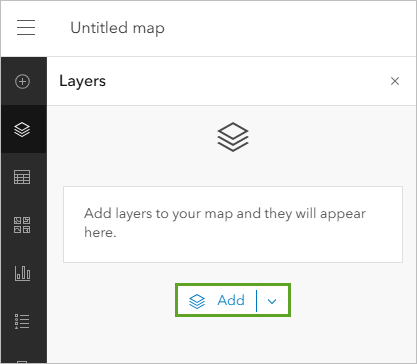

4. From the drop-down menu, click **Search for Layers**.

5. Click **My Content** and click **ArcGIS Online**.


6. Type *Pasadena Block Groups* in the search box.


6. Click the result that is owned by **Learn_ArcGIS** and click **Add**.


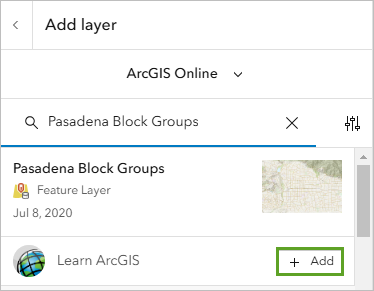

7. Search for *Pasadena Traffic Collisions* and add the **Traffic Collision** item owned by **Esri Tutorials**, and add it to the map.


8. Save the web map. Name it *Pasadena_Traffic_* followed by your initials.

Your map includes two layers: block groups and traffic collisions in the city of Pasadena, California. Each red dot in the Collisions layer represents one traffic accident involving a motor vehicle and occurring between 2008 and 2018.

<img src="https://learngis.maps.arcgis.com/sharing/rest/content/items/154062acf1dc4e1b9eff08077cd7c709/data" width="600px" />

# Create a map in ArcGIS Notebooks <a class="anchor" id="create-a-map-arcgis-nb"></a>

Now that you have created the web map manually, you’ll create and save a web map with the same layers using the ArcGIS API for Python. First you’ll create a blank notebook and build up the web map using Python. Later, you will perform analysis using the layers that you have added to the web map.

## Create a notebook

1. Starting from the webmap that you just created, next to the map title, click **Home** and click **Notebook**.


2.  Click **New Notebook** and click **Standard**.

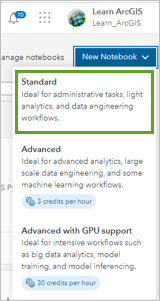


3. Before you run any code, name and save the notebook. On the ribbon, click **Save** and choose **Save As**.

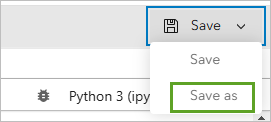


4. For **Title**, type *Pasadena Collisions Aggregated Notebook* followed by your initials. For **Tags**, type *traffic collisions* and click **Save Notebook**.

Now that the notebook is ready, you’ll create a markdown cell and add a header and description to the cell that will provide some context to your analysis. In markdown syntax, headers are shown using the number sign (#). 

5. Click the code cell at the bottom of the notebook, and on the toolbar, click the **Code** drop-down menu and click **Markdown**.  

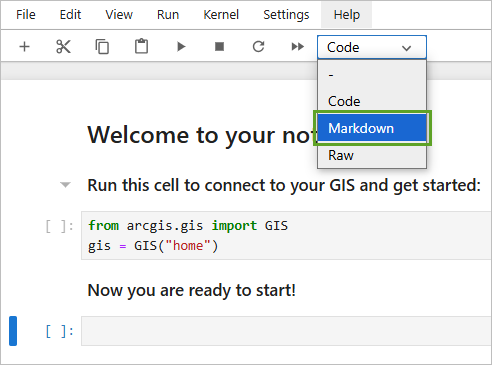


6. In the new markdown cell, copy and paste, or type the following:  

\#\# Aggregate data using ArcGIS Notebooks  

In this notebook, I will aggregate point features by Pasadena block groups and by hexagons.  

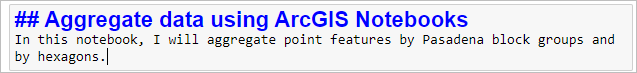  


7. Press *Shift+Enter* or click the Run button on the ribbon to run the cell. The cell will apear as formatted text, as it does below.  

Running a Markdown cell formats the text in the cell.  
Running a code cell makes the code in that cell run.  

## Aggregate data using ArcGIS Notebooks 
In this notebook, I will aggregate point features by Pasadena block groups and by hexagons.

Now you’ll call the GIS module and connect to your ArcGIS Online organization. This cell must be run first each time you use a notebook. 

8. Click the first code cell to activate it.

9.  **Run** the cell.

#### Run this cell to connect to your GIS and get started:

In [ ]:
from arcgis.gis import GIS
gis = GIS("home")

You will know a code cell has run successfully when a number appears in the brackets in the input area
so it appears as In [1]. 

10. Create a new cell beneath the other cells at the bottom of your notebook.

## Search for content

Next, you’ll find the Pasadena traffic collisions data and add it to the notebook. 

11. Click the cell you just created. 

12. On the ribbon, click **Add**.

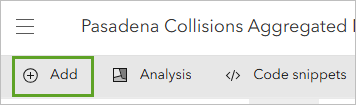

13. Click **My Content**, choose **ArcGIS Online**, search for and select <u>Traffic Collisions</u> by **Esri Tutorials**, and click **Add**.

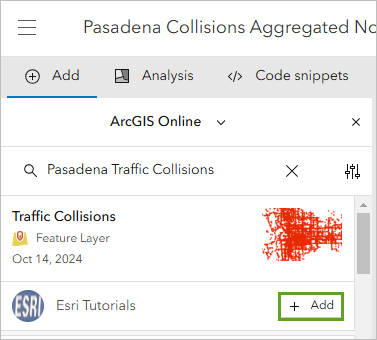

A code cell that uses ArcGIS API for Python to get the content item is added to your notebook.

By default the code cell is created with the variable name ```item```. Since you will be adding another layer, this is too generic, so it makes sense to rename this one to ```traffic```.  

14. Change the variable name from item ```item``` to ```traffic``` on both lines and run the code cell.   

In [ ]:
# Item Added From Toolbar
# Title: Traffic Collisions | Type: Feature Service | Owner: Esri_Tutorials
traffic = gis.content.get("79d3e458dcaf486f81c5591a67538179")
traffic

15. On the **Add** tab, search **ArcGIS Online** for the <u>Pasadena Block Groups</u> feature layer by ***Learn_ArcGIS***.

16. Once you find it, click **Add** to add it to the Notebook.

17. Rename the item variable **block_groups** and **run** the cell.

In [ ]:
# Item Added From Toolbar
# Title: Pasadena Block Groups | Type: Feature Service | Owner: Learn_ArcGIS
block_groups = gis.content.get("af363700f8f84c11a02f084e78a296aa")
block_groups

## Create a map

18. Beneath the **Pasadena Block Groups** item, create a new code cell.

19. In this new code cell, type or paste  
```traffic_map= gis.map('Pasadena, CA')```  
This creates a variable named ```traffic_map``` and sets it equal to a web map centered on Pasadena, California.

In [ ]:
traffic_map= gis.map('Pasadena, CA')

20. Create a new code cell and type or paste ```traffic_map```.

In [ ]:
traffic_map

21. Run the cell. This line calls the variable traffic_map and displays the Pasadena, CA map.

## Add a layer to the map

Next, you’ll add data to the map by calling the traffic and block_group items.

22. In the code cell below the map type or paste  
```traffic_map.content.add(block_groups)```  
and run the cell.  
This adds the block groups to the map by calling the ```add``` method of the ```content``` module with ```block_groups``` as the argument.

In [ ]:
traffic_map.content.add(block_groups)

23. Use the same technique to add the traffic collision data to the map.

In [ ]:
traffic_map.content.add(traffic)

24. Using the technique from **Save the map to ArcGIS Online** from the [Hello, Notebook!](https://www.arcgis.com/home/item.html?id=5aee4d0f252941e1ae421b78a8ccbe60) lesson, save the ```traffic_map``` as a web map.  

Optionally, use the sample code below.

First, define the web map properties using the following dictionary. You can edit the **title**, **snippet**, and **tags**. Remember to add your initials to the title. Run the cell.

```webmap_properties = {'title':'Pasadena_Traffic_YourInitials',
    'snippet': 'Pasadena Traffic map from a notebook.',
    'tags':['ArcGIS Notebooks', 'Pasadena', 'traffic']}```

Next, create another cell where you will save the webmap. Add the following line: ```traffic_map.save(webmap_properties)```. Run the cell.

25. On the ribbon, click **Save** and choose **Save**.

26. Close the notebook tab.  

You will reopen the **Pasadena Collisions Aggregated Notebook_YourInitials** notebook after you have done the ArcGIS Online analysis steps, below.  

If you leave the notebook running for more than 20 minutes without running Python code in it, the kernel will time out. It is a good practice to shut down ArcGIS Notebooks while they are not in use. **Standard** notebooks do not cost anything to run, but **Advanced** and **Advanced with GPU support** notebooks consume ArcGIS Online credits while they are running.

# Perform analysis in ArcGIS Online - Aggregate by block group <a class="anchor" id="perform-analysis-agol"></a>

For this series of steps, you will return to the web map you created in **[Create a map in ArcGIS Online](#create-a-map-agol)**. The data in your map shows traffic collisions in Pasadena, California. With the current symbology, there are no discernable patterns in those collisions. One way to understand the spatial distribution of this data is to aggregate the data by block group. Block groups are one of the geographies used by the United States Census Bureau in their data collection methods, and an aggregation will provide the number of
collisions that occurred in each block group. 

<b>Note: This analysis step will consume 19 credits.</b>

1. Click the browser tab to return to the ArcGIS Online map you started manually and click the **Analysis** button.


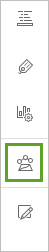

2. On the **Analysis** pane, click the **Tools** button.

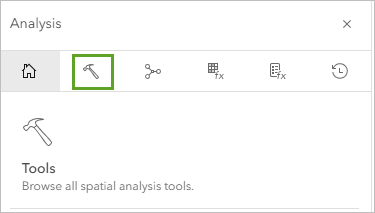

3. Search for **Aggregate** and click **Aggregate Points**.


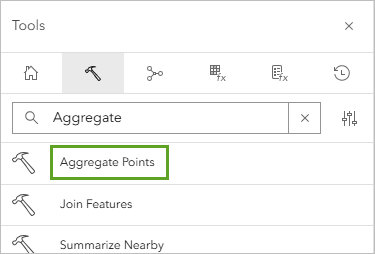

4. On the **Aggregate Points** tool, verify that the following parameters are set:
  - **Features to aggregate**, **Input point features**, should be **Traffic Collisions**.
  - **Summary areas**, **Area type** click **Polygon layer**.
  - **Summary polygon layer** should be the **Pasadena Block Groups** layer.


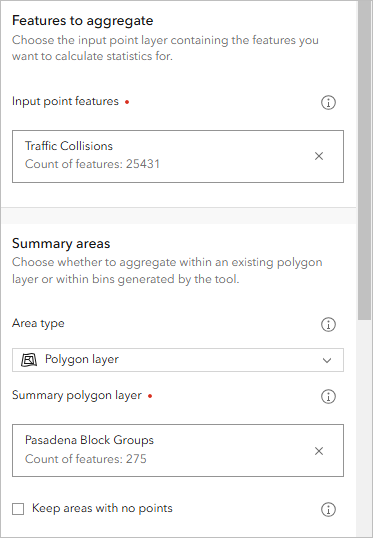

Now set the following parameters:
  - For **Result layer name**, type *Pasadena_Collisions_Aggregated* and add your initials to make sure the layer has a unique name.
  - If it is checked, uncheck **Keep areas with no points**.
  - If **Use current map extent** is checked, uncheck this box.

**Use current map extent** is a way to limit your analysis to a specific area of interest.

4. Click **Run Analysis**. The analysis may take some time to run. When it is complete, the layer is added to the web map.

5. In the **Contents** pane, uncheck **Traffic Collisions** to turn it off. The aggregation layer is shown by graduated color symbology.

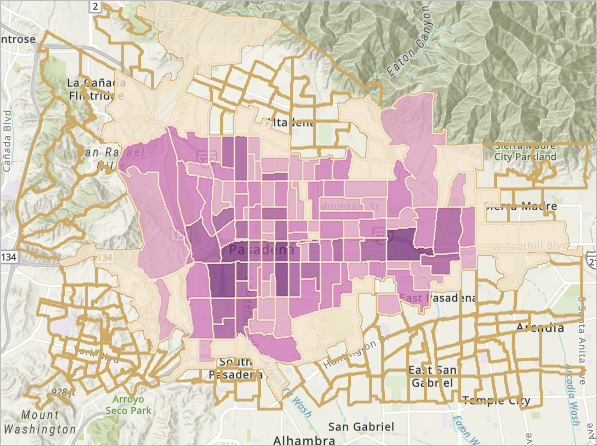

# Perform analysis in ArcGIS Online - Aggregate by hexagonal bins <a class="anchor" id="perform-analysis-agol-hexagons"></a>

Next, you’ll run the same geoprocessing tool but instead of aggregating by block group, you’ll aggregate
by one-kilometer hexagonal bins. Block groups are drawn based on a number of cultural and physical factors,
from streets and city boundaries to water bodies. As you can see from the map, these aren’t the same
size or shape. To aggregate data using a more uniform method, you’ll use a grid of hexagonal bins.

<b>Note: This analysis step will consume 19 credits.</b>


1. On the **Aggregate Points** tool, in the **Summary areas** section, for **Area type**, click **Hexagon bins**. 

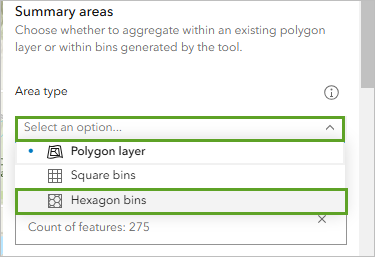

2. For **Bin size**, choose **1**.
3. For the **Bin size units** choose **Kilometers**.

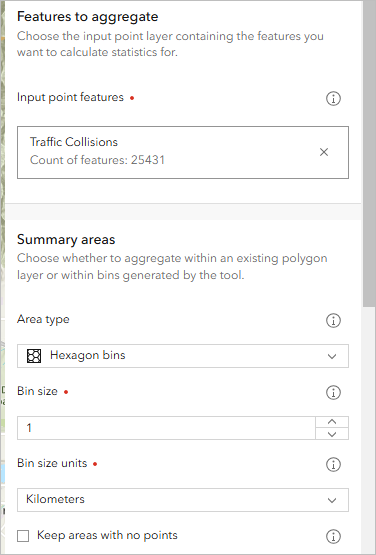

4. For **Result layer name**, type *Pasadena_Collisions_Hex_Aggregation* and add your initials. 

5. Click **Run Analysis**.

The analysis may take some time to run. When it is complete, the layer is added to the web map.

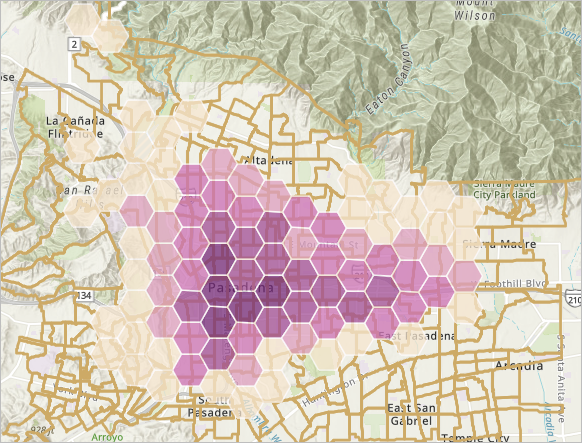

6. Save the map.

With the hexagonal aggregation, you can see that most collisions occurred in the western part of the city near the intersection of the 210 and 710 freeways. Save and close your webmap. Next you will perform the same analysis in ArcGIS Notebooks.

# Perform analysis in ArcGIS Notebooks - Aggregate by block group <a class="anchor" id="perform-analysis-block-group"></a>

Now that you’ve run analysis tasks in ArcGIS Online, you will return to the **Pasadena Collisions Aggregated Notebook_YourInitials** ArcGIS Notebook that you created to analyze the the same **Pasadena Traffic Collisions** and **Pasadena Block Groups** layers using Python.  

<b>Note: This analysis step will consume 19 credits.</b>

1. On your ArcGIS Online **Content** page, find the **Pasadena Collisions Aggregated Notebook_YourInitials** ArcGIS Notebook and open it.

2. Re-run all the cells by clicking the **Run** menu and clicking **Run All Cells**. 

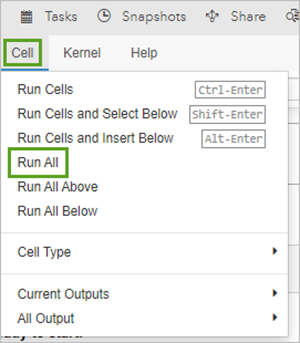

You will start writing code to perform analysis at the end of all of the cells that you have already completed.

3. Scroll down to the last cell and click it, then on the ribbon, click **Analysis**.

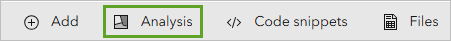



4. In the **Add Analysis Tools** pane, expand **Summarize Data**. For **Aggregate Points**, click the **Add** button. 

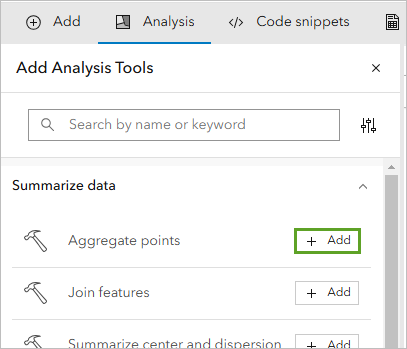

A new code block that imports the features module from ArcGIS API for Python and calls the **aggregate_points()** function is added to your notebook. Before running any code, you’ll review the function signature to see the parameters required for the aggregate_features function. Each parameter must be typed exactly as the function expects, or an error will occur.

In [ ]:
from arcgis import features
features.summarize_data.aggregate_points()

5. Replace the open and close parentheses **()** with a question mark **?** and run the cell.

    This calls the function signature. The signature prints all the parameters that the ```aggregate_points``` function uses as inputs. Note that some of these are optional.

In [ ]:
from arcgis import features
features.summarize_data.aggregate_points?

6. Next, you’ll populate the function with the appropriate input parameters to run the analysis. On the second line, add ```collisions_by_block_group =``` before ```feature.summarize```.  This sets a new variable that will hold the result of the analysis process and names it ```collisions_by_block_group```.

7. Inside the parentheses, add ```point_layer = traffic```, This sets the name of the point layer that the tool will summarize.

8. Inside the parentheses, set ```polygon_layer = block_groups```. This sets the features that define how the traffic points will be aggregated.


9. Still inside the parentheses, set ```output_name = "collisions_by_block_group_YOURINITIALS"```. This will be the name of the output features.

10. Finally, in the parentheses, set ```keep_boundaries_with_no_points=False```. This tells the tool to omit boundaries that don't contain any points. Your function will look like this:

In [ ]:
from arcgis import features
collisions_by_block_group = features.summarize_data.aggregate_points(point_layer = traffic,
                                                                     polygon_layer= block_groups, 
                                                                     output_name = "collisions_by_block_group_YOURINITIALS",
                                                                     keep_boundaries_with_no_points=False)

11. Run the cell. The process might take a few minutes to run. The processing cell is noted with an asterisk between the brackets. This time, the function creates an aggregation layer named ```collisions_by_block_group```.

12. In a new cell, below the previous cell, type ```collisions_by_block_group``` and run the cell. This generates a preview of the analysis results in your ArcGIS Online account.

In [ ]:
collisions_by_block_group

You'll now create a new map in your notebooks to display the result of the aggregation analysis.

13. Create another map over Pasadena named ```traffic_map_1```

In [ ]:
traffic_map_1 = gis.map('Pasadena, CA')
traffic_map_1

14. Add **collisions_by_block_group** to the map.

In [ ]:
traffic_map_1.content.add(collisions_by_block_group)

This map is identical to the map you created earlier in ArcGIS Online in which you aggregated
collisions by block group.

# Perform analysis in ArcGIS Notebooks - Aggregate by hexagonal bins <a class="anchor" id="perform-analysis-hexbins"></a>

You have seen how you can aggregate by hexagonal bins in ArcGIS Online. Next, you will aggregate points by hexagonal bins using ArcGIS Notebooks and the ArcGIS API for Python. While the process of aggregating by hexagonal bins was a single step in ArcGIS Online, it takes two steps using version 1.8.2 or earlier of the ArcGIS API for Python. First, you’ll generate the hexagon layer using the [Generate Tessellation](https://doc.arcgis.com/en/arcgis-online/analyze/generate-tessellations.htm) analysis tool. Then, you’ll use the hexagon tessellation as the features by which you aggregate the points.

<b>Note: This analysis step will consume 19 credits.</b>

1. **Add Analysis Tools** pane, expand **Manage Data**. Click the **Add** button next to the **Generate Tessellations** tool to add it to the notebook.

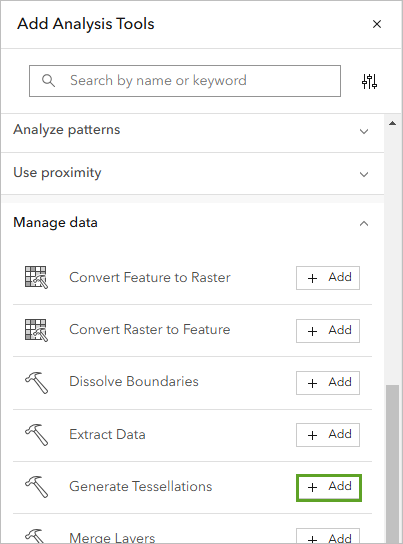

This adds a new code block that imports the features module from ArcGIS API for Python to your notebook and shows you how to call **generate_tessellation()**. 
Do not run the cell yet. 
In the **Analysis Tools** pane, if necessary, collapse **Summarize Data**.

In [ ]:
from arcgis import features
features.manage_data.generate_tessellation()

2. In the code cell, define a variable named ```hexbins``` and set ```hexbins = features.manage_data.generate_tessellation()```. The ```hexbins``` variable will hold the hexagonal tessellation feature layer item that you generate.

3. Read the [**generate_tessellation**](https://developers.arcgis.com/python/api-reference/arcgis.features.manage_data.html?highlight=generate#arcgis.features.manage_data.generate_tessellation) help documentation. For the tool to generate a hexagon tessellation feature layer, the following parameters need to be set: ```extent_layer```, ```bin_size```, ```bin_size_unit```, ```bin_type```, and ```output_name```. 

4. Inside the ```generate_tessellation()``` function, set the input variables as follows:
    - ```extent_layer=block_groups```
    - ```bin_size=1```
    - ```bin_size_unit='SquareKilometers'```
    - ```bin_type='HEXAGON'```
    - ```output_name='Pasadena_CA_Hexbins_YOURINITIALS'```, replacing ```YOURINITIALS``` with your initials. 
    
Your code should look as follows:

In [ ]:
hexbins = features.manage_data.generate_tessellation(extent_layer=block_groups,
                                                     bin_size=1, 
                                                     bin_size_unit='SquareKilometers', 
                                                     bin_type='HEXAGON',
                                                     output_name='Pasadena_CA_Hexbins_YOURINITIALS')

5. Run the code cell to create the hexagonal bins.

6. Create a new code cell and type ```hexbins```. 

In [ ]:
hexbins

7. Run the cell. This displays the ArcGIS Online item preview. You will use the ```hexbins``` to aggregate the traffic collision points.

8. In the **Analysis Tools** pane, expand **Summarize Data**. For **Aggregate Points**, click the **Add Code Snippet** button. This adds a new code block that imports the features module from ArcGIS API for Python to your notebook and shows you how to call **aggregate_points()**. This time, you will use ```hexbins``` as the aggregating features.

9. Similar to what you did for aggregating by block groups, put ```collisions_by_hexbin =``` before ```feature.summarize```. This sets a new variable that will hold the result of the analysis process and names it ```collisions_by_hexbin```.


10. Populate the ```point_layer```, ```output_name```, ```polygon_layer```, and ```keep_boundaries_with_no_points``` variables like you did above. For the ```polygon_layer```, use ```hexbins```. For the ```output_name``` argument, call the result ***collisions_by_1km_hexbin_*** followed by your initials. Your code will look like the following code cell:

In [ ]:
collisions_by_hexbin = features.summarize_data.aggregate_points(point_layer=traffic,
                                         output_name='collisions_by_1km_hexbin_YOURINITIALS', 
                                         polygon_layer=hexbins,
                                         keep_boundaries_with_no_points=True)

11. Run the cell.


12. Once the process completes, create a cell below the last cell, type ```collisions_by_hexbin```, and run the cell. This generates a preview of the analysis results in your ArcGIS Online account. Now that you have aggregated the points by hexagonal bins, you’ll visualize the results.

In [ ]:
collisions_by_hexbin

13. Create a code cell in your notebook below the ```collisions_by_hexbin``` result. Using what you have learned above, create a new map name ```traffic_map_2``` over Pasadena, and add the ```collisions_by_hexbin``` layer to it. 


14. Use what you know about saving the map view as a web map to save ```traffic_map_1``` and ```traffic_map_2``` as web maps.  

If you need help, refer to the **Save the map to ArcGIS Online** section of the [Hello, Notebook!](https://learngis.maps.arcgis.com/home/item.html?id=badcc4eb14784fcb8388e69568d2edc6) lesson.

15. Save your notebook so that you can come back to this item later and rerun the code, modify the notebook, or extend the analysis.

# Summary <a class="anchor" id="summary"></a>

In this lesson, you learned how to use ArcGIS Notebooks and ArcGIS API for Python to translate a common web GIS workflow into a Python programming workflow. You added content to a web map, performed spatial analysis in ArcGIS Online, and followed up by completing those same tasks in ArcGIS Notebooks. To learn more about Python and ArcGIS Notebooks, continue with the Learn Python with ArcGIS Notebooks lessons. 

# Challenge <a class="anchor" id="challenge"></a>

Now that you know how to create a map, add content, and perform analysis, take some time to apply your knowledge.  Here are two options to test your understanding of Python and web GIS.

1. Using the same **Pasadena Traffic Collisions** layer, perform a pattern analysis using one of the **Analysis Tools** from **Analyze Patterns**.

2. Find two layers in ArcGIS Online, one a point feature layer similar to **Pasadena Traffic Collisions** and another that is a polygon layer similar to **Pasadena Block Groups** and repeat the same analysis that you performed through this notebook.